In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose


In [9]:
file_path = './economic-indicators.csv'
df = pd.read_csv(file_path)
data=df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

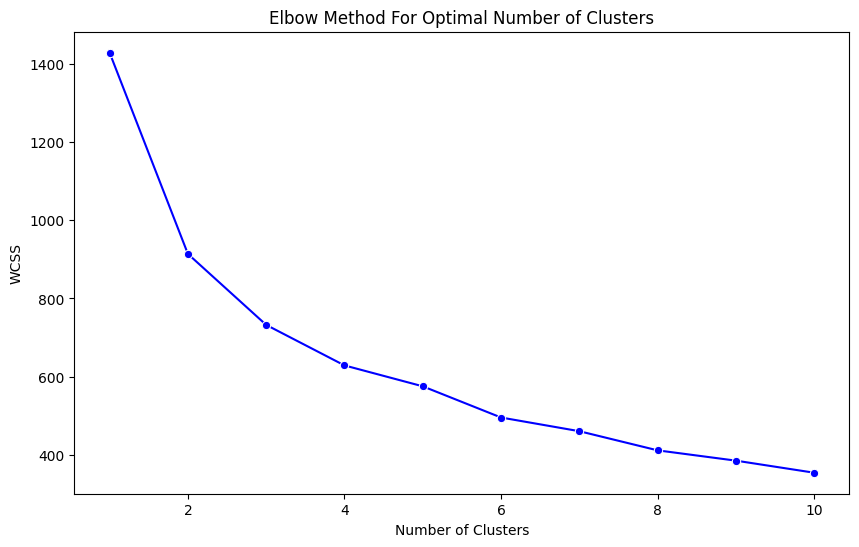

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing: Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 2:])  # Excluding Year and Month columns
# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [54]:
# Performing K-means clustering with 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fitting the models
clusters_3 = kmeans_3.fit_predict(scaled_data)
clusters_4 = kmeans_4.fit_predict(scaled_data)

# Adding the cluster information back to the original data for analysis
data_with_clusters_3 = df.copy()
data_with_clusters_3['Cluster'] = clusters_3

data_with_clusters_4 = df.copy()
data_with_clusters_4['Cluster'] = clusters_4

# Returning the first few rows of each for inspection
data_with_clusters_3.head(), data_with_clusters_4.head()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(   Year  Month  logan_passengers  logan_intl_flights  hotel_occup_rate  \
 0  2013      1           2019662                2986             0.572   
 1  2013      2           1878731                2587             0.645   
 2  2013      3           2469155                3250             0.819   
 3  2013      4           2551246                3408             0.855   
 4  2013      5           2676291                3240             0.858   
 
    hotel_avg_daily_rate  total_jobs  unemp_rate  labor_force_part_rate  \
 0                158.93      322957       0.066                  0.631   
 1                165.50      324295       0.060                  0.629   
 2                187.45      325597       0.058                  0.631   
 3                233.44      326101       0.058                  0.632   
 4                237.89      325160       0.063                  0.633   
 
    pipeline_unit  ...  pipeline_sqft  pipeline_const_jobs  foreclosure_pet  \
 0            329

In [55]:
# Calculating mean values of economic indicators for each cluster
mean_values_3_clusters = data_with_clusters_3.groupby('Cluster').mean()
mean_values_4_clusters = data_with_clusters_4.groupby('Cluster').mean()

# Displaying the mean values for each cluster
mean_values_3_clusters, mean_values_4_clusters


(                Year     Month  logan_passengers  logan_intl_flights  \
 Cluster                                                                
 0        2015.555556  5.333333      2.590548e+06         3453.888889   
 1        2017.619048  6.857143      3.369201e+06         4464.166667   
 2        2014.060606  6.363636      2.681605e+06         3406.757576   
 
          hotel_occup_rate  hotel_avg_daily_rate     total_jobs  unemp_rate  \
 Cluster                                                                      
 0                0.712556            202.985556  347682.555556    0.041556   
 1                0.834048            259.258571  372228.309524    0.030786   
 2                0.825667            236.844848  337586.696970    0.052394   
 
          labor_force_part_rate  pipeline_unit  pipeline_total_dev_cost  \
 Cluster                                                                  
 0                     0.637222    1367.222222             1.512438e+09   
 1         

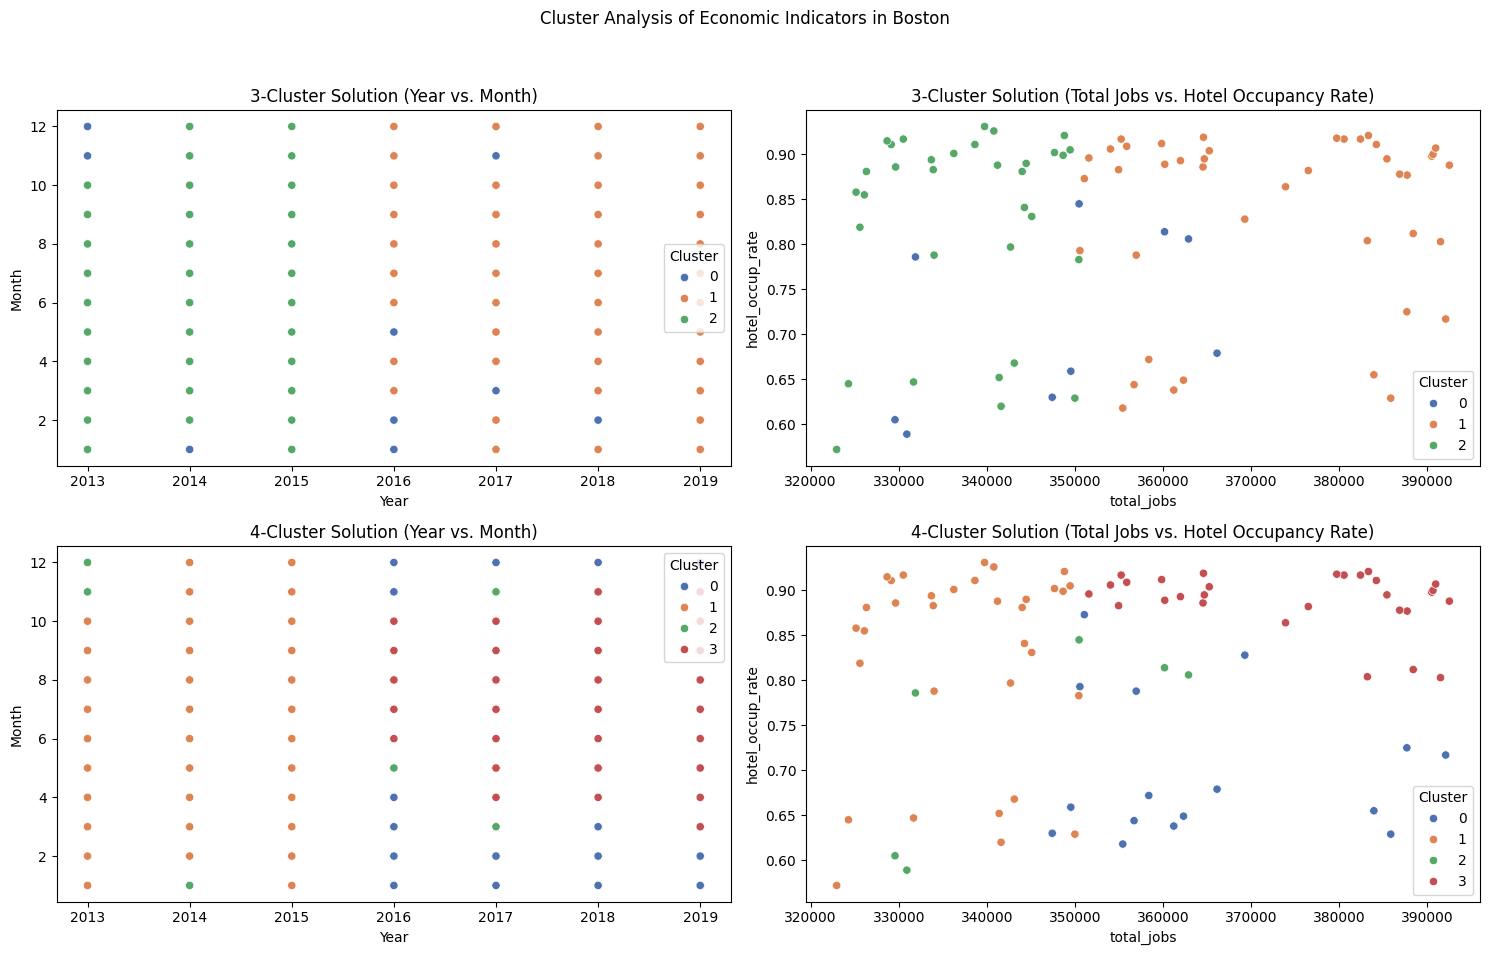

In [56]:
# Plotting graphs to visualize the clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cluster Analysis of Economic Indicators in Boston')

# Plotting for 3-Cluster Solution
sns.scatterplot(ax=axes[0, 0], data=data_with_clusters_3, x='Year', y='Month', hue='Cluster', palette='deep')
axes[0, 0].set_title('3-Cluster Solution (Year vs. Month)')
axes[0, 0].legend(title='Cluster')

sns.scatterplot(ax=axes[0, 1], data=data_with_clusters_3, x='total_jobs', y='hotel_occup_rate', hue='Cluster', palette='deep')
axes[0, 1].set_title('3-Cluster Solution (Total Jobs vs. Hotel Occupancy Rate)')
axes[0, 1].legend(title='Cluster')

# Plotting for 4-Cluster Solution
sns.scatterplot(ax=axes[1, 0], data=data_with_clusters_4, x='Year', y='Month', hue='Cluster', palette='deep')
axes[1, 0].set_title('4-Cluster Solution (Year vs. Month)')
axes[1, 0].legend(title='Cluster')

sns.scatterplot(ax=axes[1, 1], data=data_with_clusters_4, x='total_jobs', y='hotel_occup_rate', hue='Cluster', palette='deep')
axes[1, 1].set_title('4-Cluster Solution (Total Jobs vs. Hotel Occupancy Rate)')
axes[1, 1].legend(title='Cluster')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Time series analysis

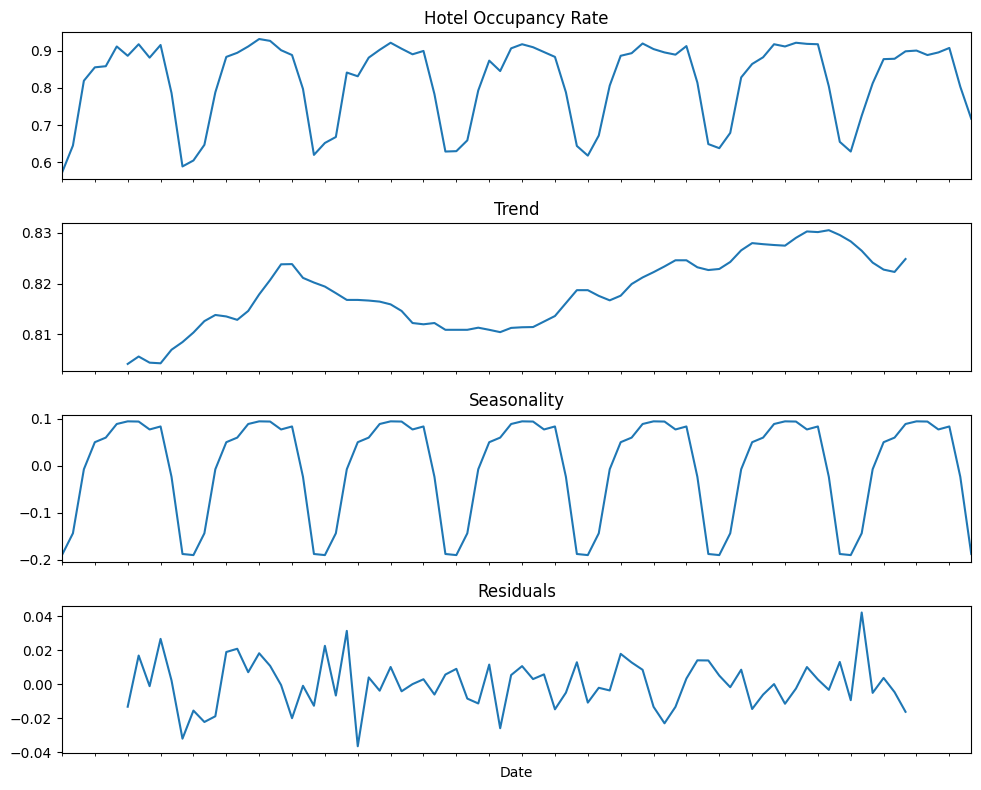

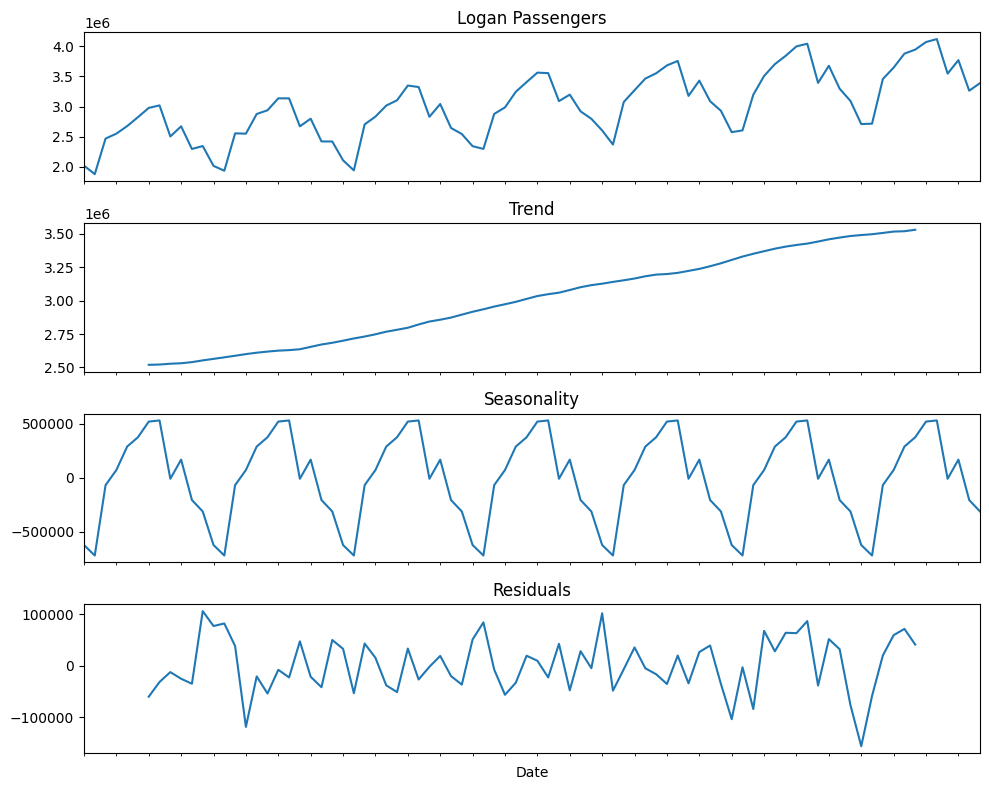

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# Creating a combined date column and setting it as index
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

# Selecting the indicators for analysis
hotel_occupancy = data['hotel_occup_rate']
logan_passengers = data['logan_passengers']

# Time Series Decomposition for Hotel Occupancy Rates
decomp_hotel = seasonal_decompose(hotel_occupancy, model='additive', period=12)
decomp_logan_passengers = seasonal_decompose(logan_passengers, model='additive', period=12)

# Plotting the decomposition results for Hotel Occupancy Rates
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomp_hotel.observed.plot(ax=axes[0], title='Hotel Occupancy Rate')
decomp_hotel.trend.plot(ax=axes[1], title='Trend')
decomp_hotel.seasonal.plot(ax=axes[2], title='Seasonality')
decomp_hotel.resid.plot(ax=axes[3], title='Residuals')

# Formatting the x-axis to show years
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

# Plotting the decomposition results for Logan Passengers
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomp_logan_passengers.observed.plot(ax=axes[0], title='Logan Passengers')
decomp_logan_passengers.trend.plot(ax=axes[1], title='Trend')
decomp_logan_passengers.seasonal.plot(ax=axes[2], title='Seasonality')
decomp_logan_passengers.resid.plot(ax=axes[3], title='Residuals')

# Formatting the x-axis
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


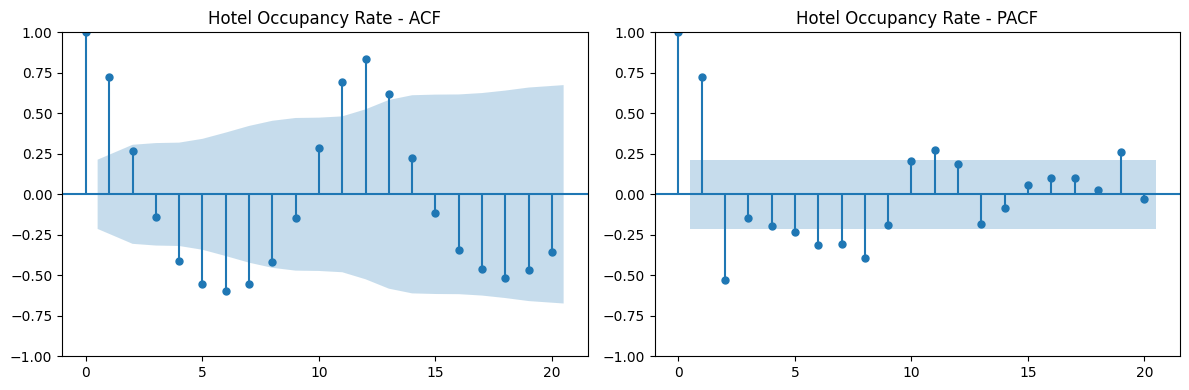

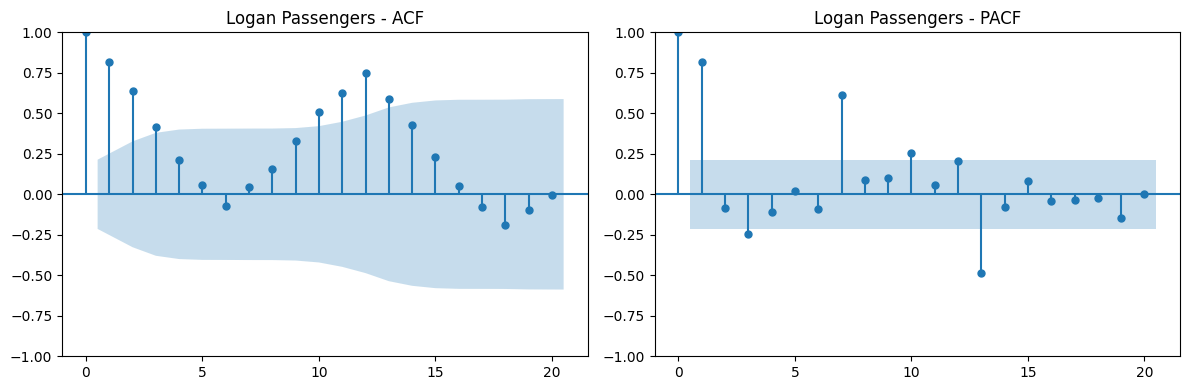

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF for Hotel Occupancy Rate
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(hotel_occupancy, ax=axes[0], title='Hotel Occupancy Rate - ACF')
plot_pacf(hotel_occupancy, ax=axes[1], title='Hotel Occupancy Rate - PACF')

plt.tight_layout()
plt.show()

# Plotting ACF and PACF for Logan Passengers
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(logan_passengers, ax=axes[0], title='Logan Passengers - ACF')
plot_pacf(logan_passengers, ax=axes[1], title='Logan Passengers - PACF')

plt.tight_layout()
plt.show()


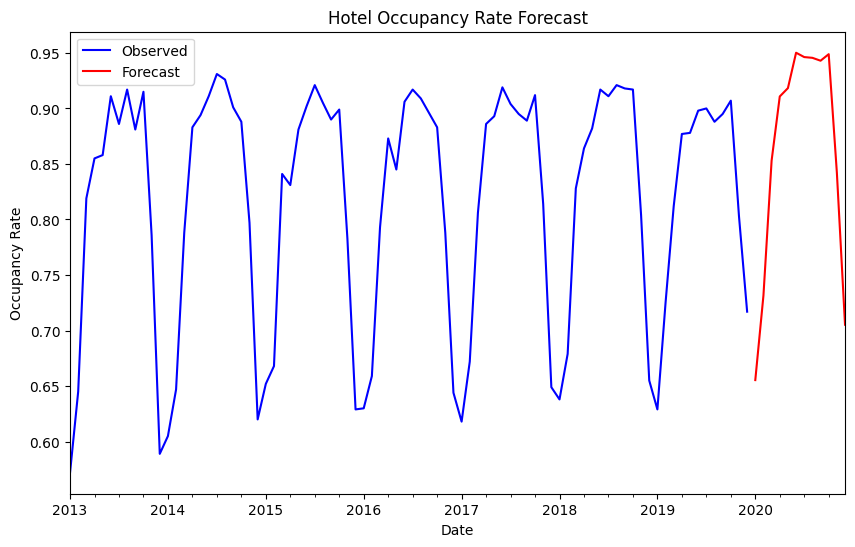

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   hotel_occup_rate   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 138.058
Date:                            Fri, 08 Dec 2023   AIC                           -266.115
Time:                                    20:23:15   BIC                           -255.900
Sample:                                01-01-2013   HQIC                          -262.145
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4524      0.214     -2.114      0.035      -0.872      -0.033
ma.L1         -0.2038      0.275     -0.742      0.458      -0.742       0.335
ar.S.L12      -0.3716      0.208     -1.786      0.074      -0.779       0.036
ma.S.L12      -0.3863      0.319     -1.210      0.226      -1.012       0.239
sigma2         0.0004   6.71e-05      6.660      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.78
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.14
Prob(H) (two-sided):                  0.75   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Function to fit SARIMA model and make forecast
def fit_sarima(series, order, seasonal_order, steps=12):
    """
    Fits a SARIMA model and makes forecasts.

    :param series: Time series data
    :param order: Tuple (p, d, q) for ARIMA parameters
    :param seasonal_order: Tuple (P, D, Q, s) for seasonal ARIMA parameters
    :param steps: Number of steps to forecast
    :return: Model fit and forecast
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

# Initial parameter estimates for hotel occupancy rate
# p, d, q values are guessed from ACF and PACF plots; P, D, Q are often set similar to p, d, q for seasonal data
order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, s

# Fitting the model and forecasting
model_fit_hotel, forecast_hotel = fit_sarima(hotel_occupancy, order, seasonal_order)

# Plotting the forecast along with historical data
plt.figure(figsize=(10, 6))
hotel_occupancy.plot(label='Observed', color='blue')
forecast_hotel.plot(label='Forecast', color='red')
plt.title('Hotel Occupancy Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()

# Summary of the model
model_fit_hotel.summary()


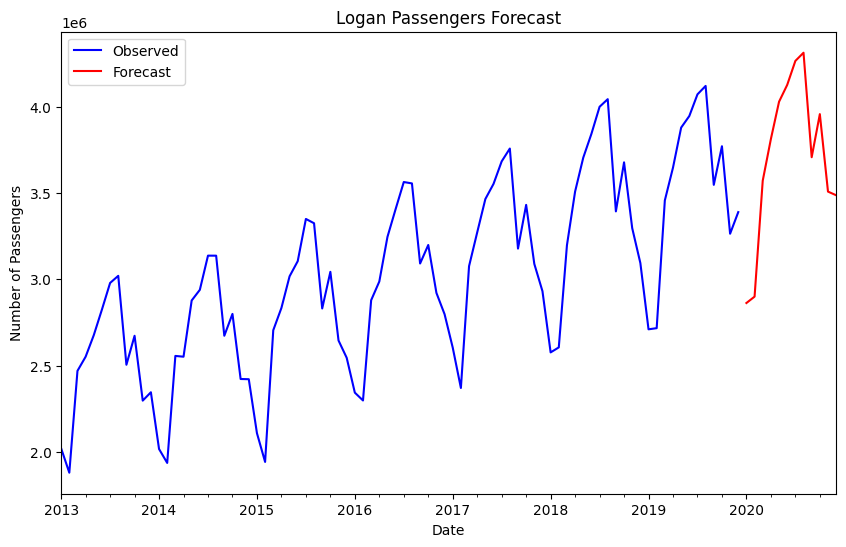

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   logan_passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -717.924
Date:                            Fri, 08 Dec 2023   AIC                           1445.848
Time:                                    20:23:44   BIC                           1456.063
Sample:                                01-01-2013   HQIC                          1449.818
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1735      0.247     -0.704      0.482      -0.657       0.310
ma.L1         -0.5852      0.160     -3.664      0.000      -0.898      -0.272
ar.S.L12      -0.3824      0.192     -1.992      0.046      -0.759      -0.006
ma.S.L12      -0.0683      0.103     -0.662      0.508      -0.270       0.134
sigma2      5.952e+09   1.27e-11    4.7e+20      0.000    5.95e+09    5.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.87   Prob(JB):                         0.57
Heteroskedasticity (H):               2.95   Skew:                            -0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.51e+36. Standard errors may be unstable.
"""

In [60]:
# Fitting SARIMA model for Logan Passengers
# Using the same initial parameter guesses as before
model_fit_logan, forecast_logan = fit_sarima(logan_passengers, order, seasonal_order)

# Plotting the forecast along with historical data for Logan Passengers
plt.figure(figsize=(10, 6))
logan_passengers.plot(label='Observed', color='blue')
forecast_logan.plot(label='Forecast', color='red')
plt.title('Logan Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Summary of the model for Logan Passengers
model_fit_logan.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


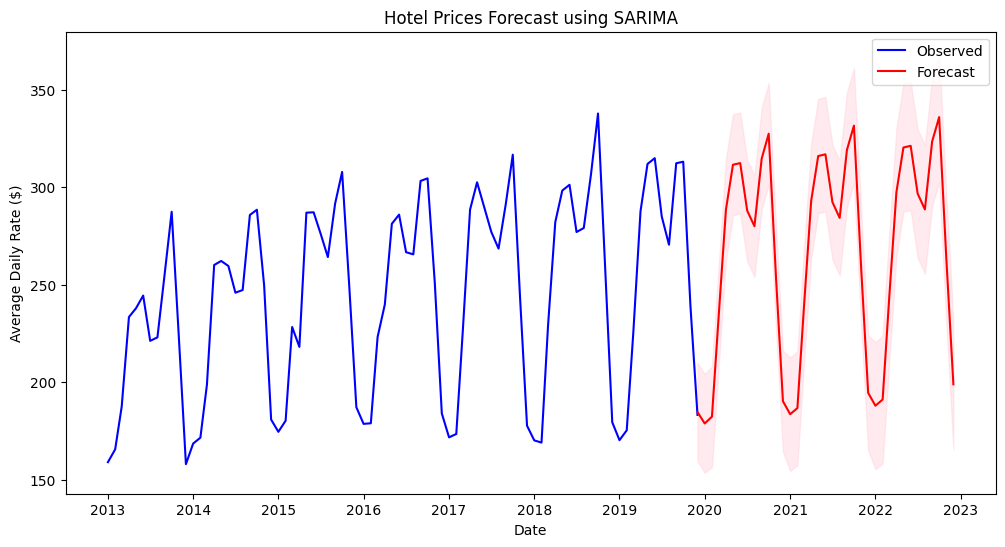

                                     SARIMAX Results                                      
Dep. Variable:               hotel_avg_daily_rate   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -228.685
Date:                            Sat, 09 Dec 2023   AIC                            467.371
Time:                                    10:44:18   BIC                            477.586
Sample:                                01-01-2013   HQIC                           471.341
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1803      0.129      1.397      0.162      -0.073       0.433
ma.L1         -0.9770      0.262   

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Preparing the time series data
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)
hotel_prices = data['hotel_avg_daily_rate']

# Check for stationarity
def check_stationarity(timeseries):
    df_test = adfuller(timeseries, autolag='AIC')
    return df_test[1]  # p-value

# If not stationary, apply differencing
if check_stationarity(hotel_prices) > 0.05:
    hotel_prices = hotel_prices.diff().dropna()

# Fit SARIMA model (example parameters, can be tuned)
order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, s
model = SARIMAX(hotel_prices, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecasting up to 2022
forecast_end_date = '2022-12-01'
forecast = model_fit.get_prediction(start=hotel_prices.index[-1], end=pd.to_datetime(forecast_end_date), dynamic=False)
forecast_conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(hotel_prices, label='Observed', color='blue')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Hotel Prices Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate ($)')
plt.legend()
plt.show()

# Model summary
print(model_fit.summary())

# Calculate the mean price for 2022
forecast_2022 = forecast.predicted_mean['2022-01-01':'2022-12-01']
average_price_2022 = forecast_2022.mean()
print("Average Hotel Price for 2022: $", average_price_2022)

# Displaying forecast values for 2022
print("Forecast Values for 2022:")
print(forecast_2022)


In [13]:
# Model summary
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:               hotel_avg_daily_rate   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -228.685
Date:                            Sat, 09 Dec 2023   AIC                            467.371
Time:                                    10:42:36   BIC                            477.586
Sample:                                01-01-2013   HQIC                           471.341
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1803      0.129      1.397      0.162      -0.073       0.433
ma.L1         -0.9770      0.262   

In [18]:
# Extracting forecasted values for the year 2022
forecast_2022 = forecast.predicted_mean['2022-01-01':'2022-12-01']

# Displaying the forecasted hotel prices for each month in 2022
forecast_2022


2022-01-01    187.907246
2022-02-01    191.066942
2022-03-01    242.919252
2022-04-01    297.483067
2022-05-01    320.435502
2022-06-01    321.323053
2022-07-01    296.781675
2022-08-01    288.681240
2022-09-01    323.517349
2022-10-01    336.040232
2022-11-01    262.926818
2022-12-01    198.896633
Freq: MS, Name: predicted_mean, dtype: float64

In [19]:
# Calculating the average of the forecasted hotel prices for 2022
average_price_2022 = forecast_2022.mean()
average_price_2022


272.33158398973427

In [20]:
# Recalculating MAPE and then calculating model accuracy in percentage

# Absolute Error
absolute_error = abs(272.96 - 262)

# Mean Absolute Percentage Error (MAPE)
mape = (absolute_error / 262) * 100

# Model Accuracy
model_accuracy_percentage = 100 - mape
model_accuracy_percentage


95.81679389312978